# Market Basket Analysis of Store Data
### Dataset Description
We have library(apyori) to calculate the association rule using Apriori.

In [91]:
!pip install apyori

#### Import libraries 

In [92]:
# IMPORT libraries
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import ARutils
%matplotlib inline

#### Read dataset

In [93]:
# load dataset 
store_data =  pd.read_csv('marketbasket.csv')

In [94]:
store_data

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No,No,No,No,No,No,No,No,No,No,No,No,No,No
996,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No
997,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes
998,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes


In [95]:
store_data.size

14000

In [96]:
# analyze data 
store_data.head()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


In [97]:
store_data.tail()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
995,No,No,No,No,No,No,No,No,No,No,No,No,No,No
996,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No
997,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes
998,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes
999,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes


In [98]:
# describe dataset
store_data.describe()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
freq,946,637,720,851,558,958,721,766,643,619,536,510,678,543


In [99]:
store_data.isnull().sum()

apples       0
banana       0
coke         0
turkey       0
bourbon      0
ice_cream    0
baguette     0
soda         0
choclate     0
cracker      0
cosmetics    0
avocado      0
artichoke    0
sardines     0
dtype: int64

In [100]:
store_data.info

<bound method DataFrame.info of     apples banana coke turkey bourbon ice_cream baguette soda choclate  \
0       No    Yes  Yes    Yes     Yes        No      Yes  Yes      Yes   
1       No     No  Yes     No     Yes        No      Yes  Yes       No   
2       No    Yes   No     No     Yes       Yes      Yes  Yes      Yes   
3       No     No  Yes    Yes     Yes        No      Yes   No       No   
4       No    Yes   No     No     Yes        No      Yes  Yes      Yes   
..     ...    ...  ...    ...     ...       ...      ...  ...      ...   
995     No     No   No     No      No        No       No   No       No   
996     No     No   No     No      No        No       No   No       No   
997     No    Yes  Yes    Yes     Yes        No       No  Yes       No   
998    Yes    Yes   No     No     Yes        No       No   No      Yes   
999     No     No   No     No     Yes        No      Yes  Yes       No   

    cracker cosmetics avocado artichoke sardines  
0        No        No      N

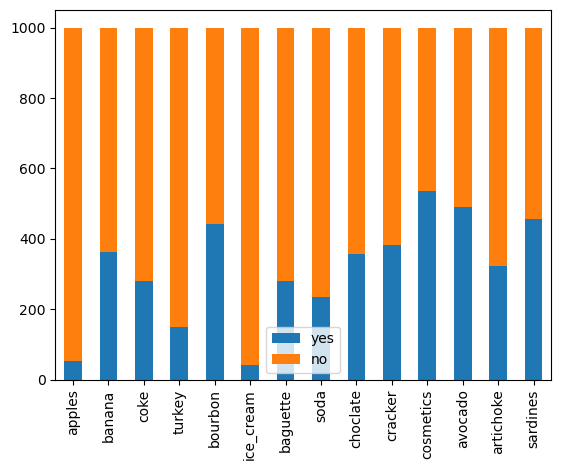

In [101]:
# plot and explor the data
yes = (store_data=='Yes').sum()
no = (store_data=='No').sum()
purchased = pd.concat([yes,no],axis=1,keys=['yes','no'])
ax = purchased.plot.bar(stacked=True)
plt.show()

### Plot and explore the “store_data” dataset with Dataframe.plot.bar() function to show how many values are in each columns and what their distributions are.

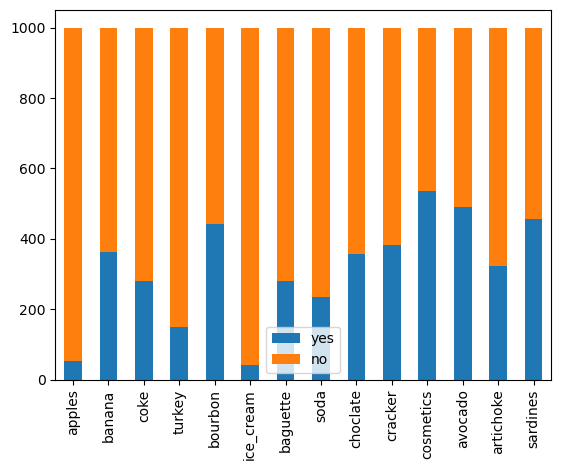

In [102]:
# plot and explor the data
# yes = (store_data=='Yes').sum()
# no = (store_data=='No').sum()
# purchased = pd.concat([yes,no],axis=1,keys=['yes','no'])
ax = purchased.plot.bar(stacked=True)
plt.show()

### The following example, containing 4 simple transactions, shows how the apriori algorithm in Python works.

In [103]:
# creating a sample transations
# it is a small sample of apriori algo in python

transactions = [
    ['Milk', 'Bread', 'Saffron'],
    ['Milk', 'Saffron'],
    ['Bread', 'Saffron', 'Wafer'],
    ['Bread', 'Wafer'],
]

transactions

[['Milk', 'Bread', 'Saffron'],
 ['Milk', 'Saffron'],
 ['Bread', 'Saffron', 'Wafer'],
 ['Bread', 'Wafer']]

### By passing a list of transactions (a list of lists), the minimum support, and the minimum confidence into the apriori class, a list of association rules will be obtained.

In [104]:
# generation association rules
Rules = list(apriori(transactions, min_support=0.2, min_confidence=0.5))

### ARutils.extract function, extracts the related rules as well as their support, confidence and lift. We can use this function to return the set of rules as a list of lists, which we can then use to create a pandas Data Frame.

In [105]:
# extract the already created rule
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS','RHS','Support', 'Confidence', 'Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[Bread],0.75,0.750000,1.000000
1,[],[Milk],0.50,0.500000,1.000000
2,[],[Saffron],0.75,0.750000,1.000000
3,[],[Wafer],0.50,0.500000,1.000000
4,[Milk],[Bread],0.25,0.500000,0.666667
5,[],"[Bread, Saffron]",0.50,0.500000,1.000000
6,[Bread],[Saffron],0.50,0.666667,0.888889
7,[Saffron],[Bread],0.50,0.666667,0.888889
8,[],"[Bread, Wafer]",0.50,0.500000,1.000000
9,[Bread],[Wafer],0.50,0.666667,1.333333


### We can view the rules generated using the ARutils.inspect function

In [106]:
ARutils.inspect(associationRules)

The number of associated rules: 23
LHS: [] --> RHS:['Bread'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Milk'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Wafer'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Milk'] --> RHS:['Bread'], support: 0.25, confidence: 0.50, lift: 0.67
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Bread', 'Saffron'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Bread'] --> RHS:['Saffron'],

### To convert this data frame into a list of lists, ARutils.data_prepare has been implemented.

In [107]:
#preprocess the main dataset
transactions = ARutils.data_prepare(store_data)

In [108]:
transactions

[['banana',
  'coke',
  'turkey',
  'bourbon',
  'baguette',
  'soda',
  'choclate',
  'sardines'],
 ['coke', 'bourbon', 'baguette', 'soda', 'cosmetics', 'avocado'],
 ['banana',
  'bourbon',
  'ice_cream',
  'baguette',
  'soda',
  'choclate',
  'cracker',
  'cosmetics',
  'avocado',
  'artichoke'],
 ['coke', 'turkey', 'bourbon', 'baguette', 'cosmetics', 'sardines'],
 ['banana',
  'bourbon',
  'baguette',
  'soda',
  'choclate',
  'cracker',
  'avocado',
  'artichoke'],
 ['bourbon', 'sardines'],
 ['banana',
  'coke',
  'turkey',
  'bourbon',
  'baguette',
  'soda',
  'choclate',
  'cracker',
  'cosmetics',
  'avocado'],
 ['coke', 'turkey', 'baguette', 'choclate', 'cracker', 'avocado'],
 ['bourbon', 'cosmetics', 'artichoke'],
 ['apples', 'banana', 'coke', 'turkey', 'choclate', 'cracker'],
 ['coke', 'baguette', 'avocado', 'artichoke', 'sardines'],
 ['coke', 'turkey', 'bourbon', 'baguette', 'choclate', 'cracker', 'cosmetics'],
 ['banana', 'bourbon', 'soda', 'choclate', 'cracker', 'avocado

##### Applying Apriori Algorithm; the next step is to apply the Apriori algorithm on the dataset. To do so, we can use the apriori class that we imported from the apyori library. This class requires some parameter values to work. The first parameter is the list of lists that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater  than the confidence threshold specified by the parameter. Using the apriori class by sending the transactions object and identifying the minimum support and confidence; you can extract and inspect rules on the marketbasket dataset. As you can see, there are 27,348 rules in total!

In [109]:
Rules = list(apriori(transactions, min_support=0.02, min_confidence=0.2))
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df)

27348

##### One of the advantages of using pandas Data Frames is that we can easily filter and sort the data within it. For example, lets take a look at the top ten rules with the highest lift. To do that, we can use the nlargest() method.

In [110]:
rules_df.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
26986,"[baguette, bourbon, coke, choclate]","[banana, soda, cracker, turkey]",0.022,0.400000,16.666667
27024,"[banana, soda, cracker, turkey]","[coke, bourbon, choclate, baguette]",0.022,0.916667,16.666667
26990,"[baguette, bourbon, coke, cracker]","[choclate, soda, banana, turkey]",0.022,0.423077,16.272189
27020,"[banana, soda, choclate, turkey]","[coke, bourbon, cracker, baguette]",0.022,0.846154,16.272189
27212,"[baguette, coke, cracker, sardines]","[choclate, bourbon, soda, turkey]",0.021,0.552632,16.253870
27230,"[choclate, bourbon, soda, turkey]","[coke, cracker, sardines, baguette]",0.021,0.617647,16.253870
27013,"[banana, bourbon, cracker, turkey]","[coke, soda, choclate, baguette]",0.022,0.647059,16.176471
26997,"[baguette, coke, choclate, soda]","[banana, bourbon, cracker, turkey]",0.022,0.550000,16.176471
27176,"[choclate, soda, turkey]","[coke, cracker, baguette, sardines, bourbon]",0.021,0.552632,15.789474
27266,"[coke, cracker, baguette, sardines, bourbon]","[choclate, soda, turkey]",0.021,0.600000,15.789474


In [111]:
rules_df.nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
55,[],"[avocado, cosmetics]",0.356,0.356000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468


In [112]:
rules_df.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[apples, turkey]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[avocado, turkey]",[coke],0.068,1.0,3.571429
726,"[baguette, turkey]",[coke],0.097,1.0,3.571429
860,"[banana, turkey]",[coke],0.070,1.0,3.571429
965,"[bourbon, turkey]",[coke],0.092,1.0,3.571429
1038,"[choclate, turkey]",[coke],0.083,1.0,3.571429
1058,"[choclate, ice_cream]",[cracker],0.023,1.0,2.624672
1104,"[turkey, cosmetics]",[coke],0.074,1.0,3.571429


#### We can see that the top rules that have most support are those with an empty itemset on the LHS. However, these aren’t particularly useful as rules as they don’t provide any association. We can use a lambda function to filter out those rules which have an empty list in the LHS column of the Data Frame.

In [113]:
rules_df[rules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468
126,[choclate],[cracker],0.321,0.899160,2.359999
127,[cracker],[choclate],0.321,0.842520,2.359999
115,[bourbon],[sardines],0.297,0.671946,1.470341
116,[sardines],[bourbon],0.297,0.649891,1.470341
149,[cosmetics],[sardines],0.238,0.444030,0.971619
150,[sardines],[cosmetics],0.238,0.520788,0.971619
108,[bourbon],[cosmetics],0.231,0.522624,0.975046
109,[cosmetics],[bourbon],0.231,0.430970,0.975046


In [114]:
# creating rules to main dataset
Rules = list(apriori(transactions, min_support=0.02, min_confidence=0.2, max_length=3))
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df)

1168

In [115]:
rules_df.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
724,[turkey],"[baguette, coke]",0.097,0.651007,5.208054
725,"[baguette, coke]",[turkey],0.097,0.776000,5.208054
1130,[turkey],"[coke, soda]",0.068,0.456376,4.907267
1131,"[coke, soda]",[turkey],0.068,0.731183,4.907267
208,"[coke, apples]",[turkey],0.020,0.714286,4.793864
1036,[turkey],"[choclate, coke]",0.083,0.557047,4.157067
1037,"[choclate, coke]",[turkey],0.083,0.619403,4.157067
1116,"[coke, cracker]",[turkey],0.081,0.618321,4.149803
1115,[turkey],"[coke, cracker]",0.081,0.543624,4.149803
963,[turkey],"[coke, bourbon]",0.092,0.617450,4.143957


In [116]:
rules_df.nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
55,[],"[avocado, cosmetics]",0.356,0.356000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468


In [117]:
rules_df.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[apples, turkey]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[avocado, turkey]",[coke],0.068,1.0,3.571429
726,"[baguette, turkey]",[coke],0.097,1.0,3.571429
860,"[banana, turkey]",[coke],0.070,1.0,3.571429
965,"[bourbon, turkey]",[coke],0.092,1.0,3.571429
1038,"[choclate, turkey]",[coke],0.083,1.0,3.571429
1058,"[choclate, ice_cream]",[cracker],0.023,1.0,2.624672
1104,"[turkey, cosmetics]",[coke],0.074,1.0,3.571429


#### we should find the most popular products based on sales dataset. plotting could be the easiest way to find the most purchased item

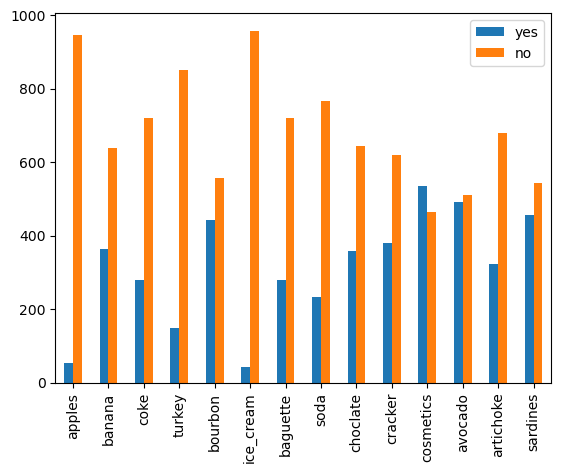

In [118]:
# investigating the dataset in more depth
ax = purchased.plot.bar()
plt.show()

#### According to the plot, cosmetics are the most popular items. Since we want to see rules where customers are buying more of the items, so use the following code to get those rules for cosmetics

In [119]:
Rules = list(apriori(transactions, min_support=0.1, min_confidence=0.90))
associationRules = ARutils.extract(Rules, 'cosmetics',2)
ARutils.inspect(associationRules)

The number of associated rules: 0


#### Regarding the result, there are no rules available for the given parameter (the minimum confidence is too high in this case). Change the confidence parameter value to 50% (0.50), A lower confidence threshold allows more rules to show up.

In [120]:

Rules = list(apriori(transactions, min_support=0.1, min_confidence=0.5))
associationRules = ARutils.extract(Rules, 'cosmetics',2)
ARutils.inspect(associationRules)


The number of associated rules: 24
LHS: ['artichoke'] --> RHS:['cosmetics'], support: 0.17, confidence: 0.52, lift: 0.97
--------------------------------------------------------------------------------
LHS: ['avocado'] --> RHS:['cosmetics'], support: 0.36, confidence: 0.73, lift: 1.36
--------------------------------------------------------------------------------
LHS: ['banana'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.53, lift: 0.99
--------------------------------------------------------------------------------
LHS: ['bourbon'] --> RHS:['cosmetics'], support: 0.23, confidence: 0.52, lift: 0.98
--------------------------------------------------------------------------------
LHS: ['choclate'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.54, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['coke'] --> RHS:['cosmetics'], support: 0.14, confidence: 0.51, lift: 0.95
---------------------------------------------------------

In [121]:
!pip install plotly==5.10.0

In [122]:
rules_df = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
import plotly.express as px
fig = px.scatter(rules_df, x="Support", y="Confidence", color="Lift",
                 hover_data=['LHS', 'RHS'], color_continuous_scale="agsunset")
fig.show()